In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titles.csv")
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,577842.0,22.005,8.167
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,406105.0,56.631,7.583
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,446627.0,19.900,8.022
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],NaN,tt0037059,7.5,25589.0,8.311,7.000
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,tm1305288,"Marcella Arguello: Bitch, Grow Up!",MOVIE,Arguello couples her larger-than-life stage pr...,2023,R,37,['comedy'],['US'],NaN,tt26623699,6.9,27.0,7.509,2.000
3026,tm1303655,Super-Vilains: l'Enquête,MOVIE,Comic book writers discuss how they make the v...,2023,PG-13,62,['documentation'],['FR'],NaN,tt26498712,5.5,45.0,3.402,6.000
3027,tm1296261,Just a Boy From Tupelo: Bringing Elvis to the ...,MOVIE,"Director Baz Luhrmann, actors Austin Butler an...",2023,PG-13,27,['documentation'],[],NaN,NaN,NaN,NaN,2.605,4.500
3028,tm1065897,Dionne Warwick: Don't Make Me Over,MOVIE,The story of the iconic singer's fascinating s...,2023,PG,95,"['documentation', 'music']","['US', 'GB']",NaN,tt6170406,7.8,255.0,9.371,NaN


In [3]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

# Having a feel of how a row of this data is.

In [4]:
df.loc[0]

id                                                                tm77588
title                                                          Casablanca
type                                                                MOVIE
description             In Casablanca, Morocco in December 1941, a cyn...
release_year                                                         1943
age_certification                                                      PG
runtime                                                               102
genres                                        ['drama', 'romance', 'war']
production_countries                                               ['US']
seasons                                                               NaN
imdb_id                                                         tt0034583
imdb_score                                                            8.5
imdb_votes                                                       577842.0
tmdb_popularity                       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3030 non-null   object 
 1   title                 3030 non-null   object 
 2   type                  3030 non-null   object 
 3   description           3021 non-null   object 
 4   release_year          3030 non-null   int64  
 5   age_certification     1911 non-null   object 
 6   runtime               3030 non-null   int64  
 7   genres                3030 non-null   object 
 8   production_countries  3030 non-null   object 
 9   seasons               622 non-null    float64
 10  imdb_id               2768 non-null   object 
 11  imdb_score            2731 non-null   float64
 12  imdb_votes            2714 non-null   float64
 13  tmdb_popularity       3013 non-null   float64
 14  tmdb_score            2858 non-null   float64
dtypes: float64(5), int64(

The dataset contains 3030 rows, with 15 columns of 3 datatypes thus object, int, and float.
There are missing data in a few columns.

# Knowing which columns has missing data

In [6]:
df.isna().sum()

id                         0
title                      0
type                       0
description                9
release_year               0
age_certification       1119
runtime                    0
genres                     0
production_countries       0
seasons                 2408
imdb_id                  262
imdb_score               299
imdb_votes               316
tmdb_popularity           17
tmdb_score               172
dtype: int64

# Dealing with missing data

Dropping NA in imdb_id, imdb_score, or imdb_votes

In [7]:
df = df[df["imdb_id"].notna() & df["imdb_score"].notna() & df["imdb_votes"].notna()]
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,577842.0,22.005,8.167
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,406105.0,56.631,7.583
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,446627.0,19.900,8.022
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],NaN,tt0037059,7.5,25589.0,8.311,7.000
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tm1015760,Chernobyl: The Lost Tapes,MOVIE,Newly-discovered archive footage and witness a...,2023,NaN,96,"['documentation', 'history']",['GB'],NaN,tt13913326,7.9,1424.0,NaN,NaN
3023,tm1306271,The Weeknd: Live at SoFi Stadium,MOVIE,"Filmed at LA’s SoFi Stadium, The Weeknd brings...",2023,R,98,['music'],['US'],NaN,tt26685153,8.1,257.0,23.370,5.800
3025,tm1305288,"Marcella Arguello: Bitch, Grow Up!",MOVIE,Arguello couples her larger-than-life stage pr...,2023,R,37,['comedy'],['US'],NaN,tt26623699,6.9,27.0,7.509,2.000
3026,tm1303655,Super-Vilains: l'Enquête,MOVIE,Comic book writers discuss how they make the v...,2023,PG-13,62,['documentation'],['FR'],NaN,tt26498712,5.5,45.0,3.402,6.000


In [8]:
print("Columns" +'                   '+'Number of unique values ')
for col in df.select_dtypes('object').columns:
    print('{:<23} = {}'.format(col, df[col].nunique()))

Columns                   Number of unique values 
id                      = 2714
title                   = 2680
type                    = 2
description             = 2711
age_certification       = 12
genres                  = 1003
production_countries    = 250
imdb_id                 = 2714


In [9]:
df.duplicated().sum()

0

In [10]:
df["title"].duplicated().sum()

34

In [11]:
df[df["title"].duplicated()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
105,tm142552,Little Women,MOVIE,Little Women is a coming-of-age drama tracing ...,1933,NaN,115,"['drama', 'family', 'romance', 'war']",['US'],NaN,tt0024264,7.2,7435.0,8.031,6.767
286,tm1390,A Star Is Born,MOVIE,"Drunken, has-been rock star John Norman Howard...",1973,R,139,"['drama', 'romance', 'music']",['US'],NaN,tt0075265,6.1,12184.0,12.202,6.000
418,tm124668,Love in the Afternoon,MOVIE,Lovestruck conservatory student Ariane pretend...,1957,NaN,130,"['comedy', 'drama', 'crime', 'romance']",['US'],NaN,tt0050658,7.1,16111.0,12.313,7.078
527,tm114838,The Fly,MOVIE,When Seth Brundle makes a huge scientific and ...,1986,R,96,"['horror', 'scifi', 'drama']","['CA', 'GB', 'US']",NaN,tt0091064,7.6,188068.0,31.278,7.400
534,tm138000,Batman,MOVIE,Batman must face his most ruthless nemesis whe...,1989,PG-13,126,"['fantasy', 'action', 'crime']",['US'],NaN,tt0096895,7.5,383424.0,38.304,7.210
630,tm63858,To Be or Not to Be,MOVIE,A bad Polish actor is just trying to make a li...,1983,PG,107,"['comedy', 'drama', 'war', 'action', 'european']",['US'],NaN,tt0086450,6.8,11526.0,6.478,6.800
641,tm153311,The Freshman,MOVIE,After a film student gets his belongings stole...,1990,PG,103,"['comedy', 'crime']",['US'],NaN,tt0099615,6.4,21062.0,12.755,6.253
813,ts21766,Spawn,SHOW,Todd McFarlane's Spawn is an animated televisi...,1997,TV-MA,27,"['action', 'animation', 'drama', 'crime', 'sci...",['US'],3.0,tt0500178,8.1,8579.0,20.813,7.900
864,tm12970,Richard III,MOVIE,A murderous lust for the British throne sees R...,1996,R,104,"['drama', 'scifi', 'war']",['GB'],NaN,tt0114279,7.3,15031.0,8.951,6.765
1117,tm79639,3:10 to Yuma,MOVIE,"In Arizona in the late 1800s, infamous outlaw ...",2007,R,122,"['western', 'war', 'action', 'crime', 'drama']",['US'],NaN,tt0381849,7.7,317545.0,17.876,7.199


In [12]:
df[df["title"] == "A Star Is Born"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
259,tm489,A Star Is Born,MOVIE,A movie star helps a young singer-actress find...,1954,PG,176,"['drama', 'romance']",['US'],NaN,tt0047522,7.5,18675.0,13.955,7.120
286,tm1390,A Star Is Born,MOVIE,"Drunken, has-been rock star John Norman Howard...",1973,R,139,"['drama', 'romance', 'music']",['US'],NaN,tt0075265,6.1,12184.0,12.202,6.000
2036,tm266686,A Star Is Born,MOVIE,Seasoned musician Jackson Maine discovers — an...,2018,R,135,"['drama', 'music', 'romance']",['US'],NaN,tt1517451,7.6,392449.0,36.401,7.505


all data are unique but several movies/TVshows have same title. if we look more detail, one of the reasons the data has duplicate is because one is a remake version of another

# Analysis

descriptive statistics

In [13]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2714.000000,2714.000000,578.000000,2714.000000,2.714000e+03,2703.000000,2606.000000
mean,2000.902727,86.109433,3.219723,6.936772,6.486346e+04,19.959683,6.792053
std,22.809539,36.190584,3.931629,1.009543,1.792848e+05,76.296557,1.059839
min,1918.000000,2.000000,1.000000,1.500000,5.000000e+00,0.050393,1.000000
25%,1991.000000,60.000000,1.000000,6.400000,9.312500e+02,4.012500,6.200000
50%,2009.000000,92.000000,2.000000,7.100000,8.430000e+03,9.804000,6.900000
75%,2018.000000,109.000000,4.000000,7.675000,4.675850e+04,18.518000,7.500000
max,2023.000000,299.000000,53.000000,9.400000,2.684317e+06,3481.253000,10.000000


Top 10 release-years based on imdb_score average

In [14]:
df1 = df.groupby(["release_year", "type"])["imdb_score"].mean().reset_index()
df1[df1["type"] == "MOVIE"].sort_values(by="imdb_score", ascending=False).head(10)

,release_year,type,imdb_score
24,1943,MOVIE,8.500000
1,1921,MOVIE,8.300000
11,1931,MOVIE,8.100000
19,1939,MOVIE,7.775000
35,1954,MOVIE,7.766667
28,1947,MOVIE,7.720000
43,1961,MOVIE,7.700000
34,1953,MOVIE,7.700000
20,1940,MOVIE,7.687500
18,1938,MOVIE,7.666667


In [15]:
df1[df1["type"] == "SHOW"].sort_values(by="imdb_score", ascending=False).head(10)

,release_year,type,imdb_score
9,1929,SHOW,8.800000
92,1994,SHOW,8.166667
102,1999,SHOW,8.142857
98,1997,SHOW,8.100000
55,1969,SHOW,8.000000
106,2001,SHOW,7.990000
110,2003,SHOW,7.950000
112,2004,SHOW,7.920000
84,1990,SHOW,7.900000
124,2010,SHOW,7.893333


In [16]:
df11 = df1[df1["type"] == "MOVIE"]
df12 = df1[df1["type"] == "SHOW"]
print(len(df11))
print(len(df12))

103
48


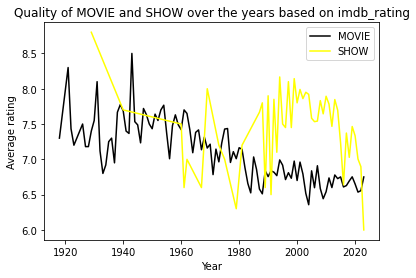

In [17]:
plt.plot(df11["release_year"], df11["imdb_score"], color = "black")
plt.plot(df12["release_year"], df12["imdb_score"], color = "yellow")
plt.legend(["MOVIE", "SHOW"])
plt.title("Quality of MOVIE and SHOW over the years based on imdb_rating")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.show()

Top 10 single production-countires based on imdb_score average

In [18]:
df2 = df.groupby(["production_countries", "type"]).mean().reset_index()
df2 = df2[["production_countries", "type", "imdb_score"]]
df2.head(10)

,production_countries,type,imdb_score
0,"['AE', 'US']",MOVIE,6.140
1,"['AR', 'BR', 'UY']",SHOW,6.800
2,"['AR', 'MX']",MOVIE,6.150
3,['AR'],MOVIE,7.700
4,['AR'],SHOW,7.140
5,"['AT', 'CH']",MOVIE,7.100
6,"['AT', 'FR', 'DE']",MOVIE,7.500
7,['AT'],MOVIE,7.225
8,"['AU', 'CA', 'GB']",MOVIE,6.400
9,"['AU', 'GB']",MOVIE,6.600


In [19]:
dummy = []
for i in range (0, len(df2)):
    if len(str(df2["production_countries"][i])) == 6:
        dummy.append("one_pro_count")
    else:
        dummy.append("many_pro_count")
dummy
df2.insert(3, "amount_of_pro_count", dummy, True)
df2

,production_countries,type,imdb_score,amount_of_pro_count
0,"['AE', 'US']",MOVIE,6.14,many_pro_count
1,"['AR', 'BR', 'UY']",SHOW,6.80,many_pro_count
2,"['AR', 'MX']",MOVIE,6.15,many_pro_count
3,['AR'],MOVIE,7.70,one_pro_count
4,['AR'],SHOW,7.14,one_pro_count
...,...,...,...,...
269,"['ZA', 'CA', 'DE']",MOVIE,7.40,many_pro_count
270,"['ZA', 'GB', 'US', 'DE']",MOVIE,6.20,many_pro_count
271,['ZA'],MOVIE,7.50,one_pro_count
272,[],MOVIE,6.31,many_pro_count


In [20]:
df2 = df2[df2["amount_of_pro_count"] == "one_pro_count"]
df21 = df2[df2["type"] == "MOVIE"]
df22 = df2[df2["type"] == "SHOW"]
df21

,production_countries,type,imdb_score,amount_of_pro_count
3,['AR'],MOVIE,7.700000,one_pro_count
7,['AT'],MOVIE,7.225000,one_pro_count
13,['AU'],MOVIE,6.962500,one_pro_count
18,['BE'],MOVIE,7.400000,one_pro_count
23,['BO'],MOVIE,6.200000,one_pro_count
26,['BR'],MOVIE,6.400000,one_pro_count
39,['CA'],MOVIE,6.162500,one_pro_count
44,['CH'],MOVIE,7.400000,one_pro_count
45,['CL'],MOVIE,5.700000,one_pro_count
50,['CO'],MOVIE,6.400000,one_pro_count


In [21]:
df22

,production_countries,type,imdb_score,amount_of_pro_count
4,['AR'],SHOW,7.140000,one_pro_count
27,['BR'],SHOW,7.687500,one_pro_count
40,['CA'],SHOW,6.200000,one_pro_count
46,['CL'],SHOW,6.950000,one_pro_count
55,['CZ'],SHOW,7.100000,one_pro_count
71,['DE'],SHOW,7.120000,one_pro_count
74,['DK'],SHOW,7.600000,one_pro_count
87,['ES'],SHOW,6.968750,one_pro_count
114,['FR'],SHOW,6.250000,one_pro_count
131,['GB'],SHOW,7.425000,one_pro_count


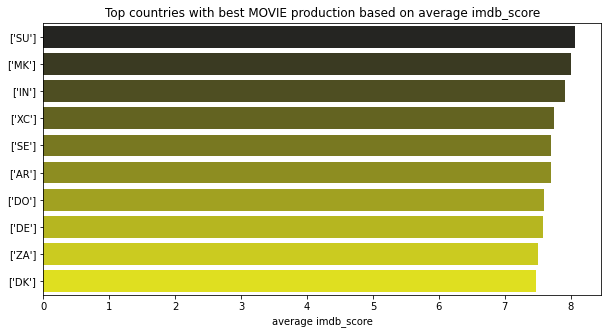

In [22]:
color = sns.dark_palette("yellow", 10)
plt.figure(figsize=(10,5))
plt.title('Top countries with best MOVIE production based on average imdb_score')
ax = sns.barplot(data=df21.sort_values(by="imdb_score", ascending=False).head(10), y="production_countries", x="imdb_score", orient='h', palette=color)
plt.xlabel('average imdb_score')
plt.ylabel('')
plt.show()

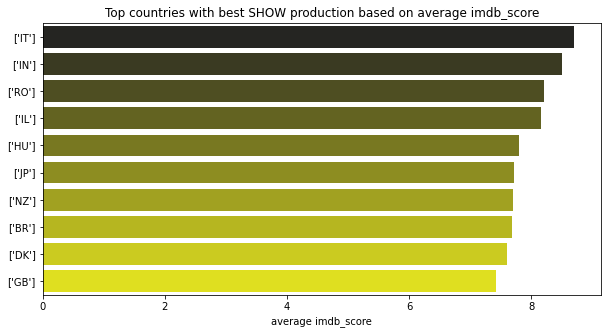

In [23]:
color = sns.dark_palette("yellow", 10)
plt.figure(figsize=(10,5))
plt.title('Top countries with best SHOW production based on average imdb_score')
ax = sns.barplot(data=df22.sort_values(by="imdb_score", ascending=False).head(10), y="production_countries", x="imdb_score", orient='h', palette=color)
plt.xlabel('average imdb_score')
plt.ylabel('')
plt.show()

Top 10 MOVIE and SHOW based on imdb_score

MOVIE

In [24]:
df31 = df[df["type"] == "MOVIE"][["imdb_score", "title", "release_year", "genres"]].sort_values(by="imdb_score", ascending=False)
df31.head(10)

,imdb_score,title,release_year,genres
707,9.3,The Shawshank Redemption,1994,['drama']
1522,9.3,Celebrity Habla,2009,['documentation']
2025,9.2,Emergency Contact,2015,['comedy']
1045,9.0,The Lord of the Rings: The Return of the King,2003,"['fantasy', 'action', 'drama']"
1025,9.0,The Dark Knight,2008,"['drama', 'thriller', 'action', 'crime']"
2925,8.9,Juan Luis Guerra 4.40: Entre Mar y Palmeras,2021,['music']
1520,8.8,Celebrity Habla 2,2010,['documentation']
1043,8.8,The Lord of the Rings: The Two Towers,2002,"['action', 'fantasy', 'drama']"
1016,8.8,The Lord of the Rings: The Fellowship of the Ring,2001,"['fantasy', 'action', 'drama']"
1482,8.7,Beah: A Black Woman Speaks,2003,['documentation']


SHOW

In [25]:
df32 = df[df["type"] == "SHOW"][["imdb_score", "title", "release_year", "genres"]].sort_values(by="imdb_score", ascending=False)
df32.head(10)

,imdb_score,title,release_year,genres
2249,9.4,Chernobyl,2019,"['drama', 'thriller', 'history']"
1012,9.4,Band of Brothers,2001,"['drama', 'war', 'history', 'action']"
1009,9.3,The Wire,2002,"['drama', 'crime', 'thriller']"
705,9.2,The Sopranos,1999,"['drama', 'crime']"
576,9.2,Eyes on the Prize,1987,"['documentation', 'history']"
1531,9.2,Game of Thrones,2011,"['scifi', 'drama', 'action', 'romance', 'fanta..."
3014,9.1,The Last of Us,2023,"['drama', 'action', 'horror', 'scifi', 'thrill..."
2736,9.1,Homegrown,2021,"['documentation', 'drama']"
1663,9.1,Rick and Morty,2013,"['animation', 'scifi', 'action', 'comedy']"
716,9.0,Batman: The Animated Series,1992,"['family', 'scifi', 'animation', 'action', 'cr..."


age_certification percentage

In [26]:
df4 = df[df["age_certification"].notna()]
df41 = df4[df["type"] == "MOVIE"]
df42 = df4[df["type"] == "SHOW"]
df41["count"] = 1
df42["count"] = 1
df41 = df41.groupby(["age_certification"]).count().reset_index()
df42 = df42.groupby(["age_certification"]).count().reset_index()
df41 = df41[["age_certification", "count"]]
df42 = df42[["age_certification", "count"]]
df41

C:\Users\fauzi\AppData\Local\Temp/ipykernel_4644/2839664557.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df41 = df4[df["type"] == "MOVIE"]
C:\Users\fauzi\AppData\Local\Temp/ipykernel_4644/2839664557.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df42 = df4[df["type"] == "SHOW"]
C:\Users\fauzi\AppData\Local\Temp/ipykernel_4644/2839664557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df41["count"] = 1
C:\Users\fauzi\AppData\Local\Temp/ipykernel_4644/2839664557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,age_certification,count
0,G,64
1,NC-17,7
2,PG,256
3,PG-13,354
4,R,589


In [27]:
df42

,age_certification,count
0,TV-14,114
1,TV-G,21
2,TV-MA,280
3,TV-PG,52
4,TV-Y,6
5,TV-Y7,34
6,TV-Y7-FV,2


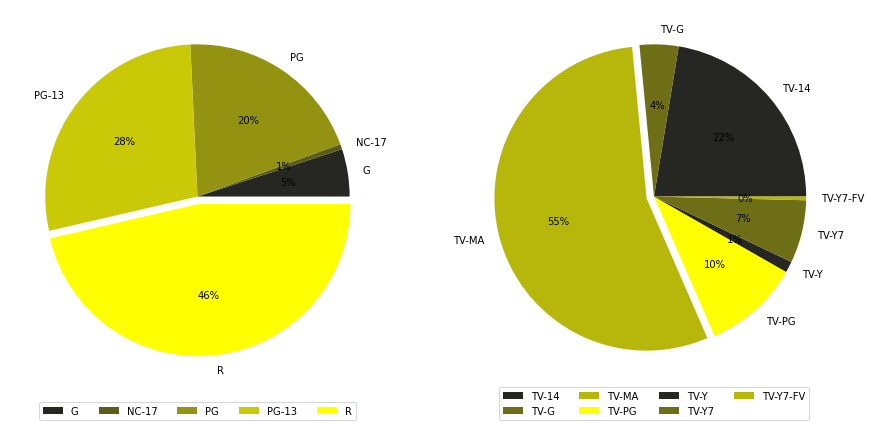

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
# declaring exploding pie
explode = [0, 0, 0, 0, 0.05]
# define Seaborn color palette to use
color = sns.dark_palette("yellow", 5)
  
# plotting data on chart
plt.pie(df41["count"], labels=df41["age_certification"], colors=color,
        explode=explode, autopct='%.0f%%')
plt.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
# declaring exploding pie
explode = [0, 0, 0.05, 0, 0, 0, 0]
# define Seaborn color palette to use
color = sns.dark_palette("yellow", 4)
  
# plotting data on chart
plt.pie(df42["count"], labels=df42["age_certification"], colors=color,
        explode=explode, autopct='%.0f%%')
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.1))

# displaying chart
plt.show()